In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno


## Carga de datos

In [11]:
original=sns.load_dataset('penguins')
original.dropna(thresh=5,inplace=True) #carga los datos y elimina las filas que tengan mas de 5 nan

In [4]:
df=pd.read_parquet('missing.parquet')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,NaN,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,NaN,13.7,214.0,4925.0,Female
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
339,Gentoo,Biscoe,50.4,15.7,222.0,NaN,Male
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Figure size 1000x600 with 0 Axes>

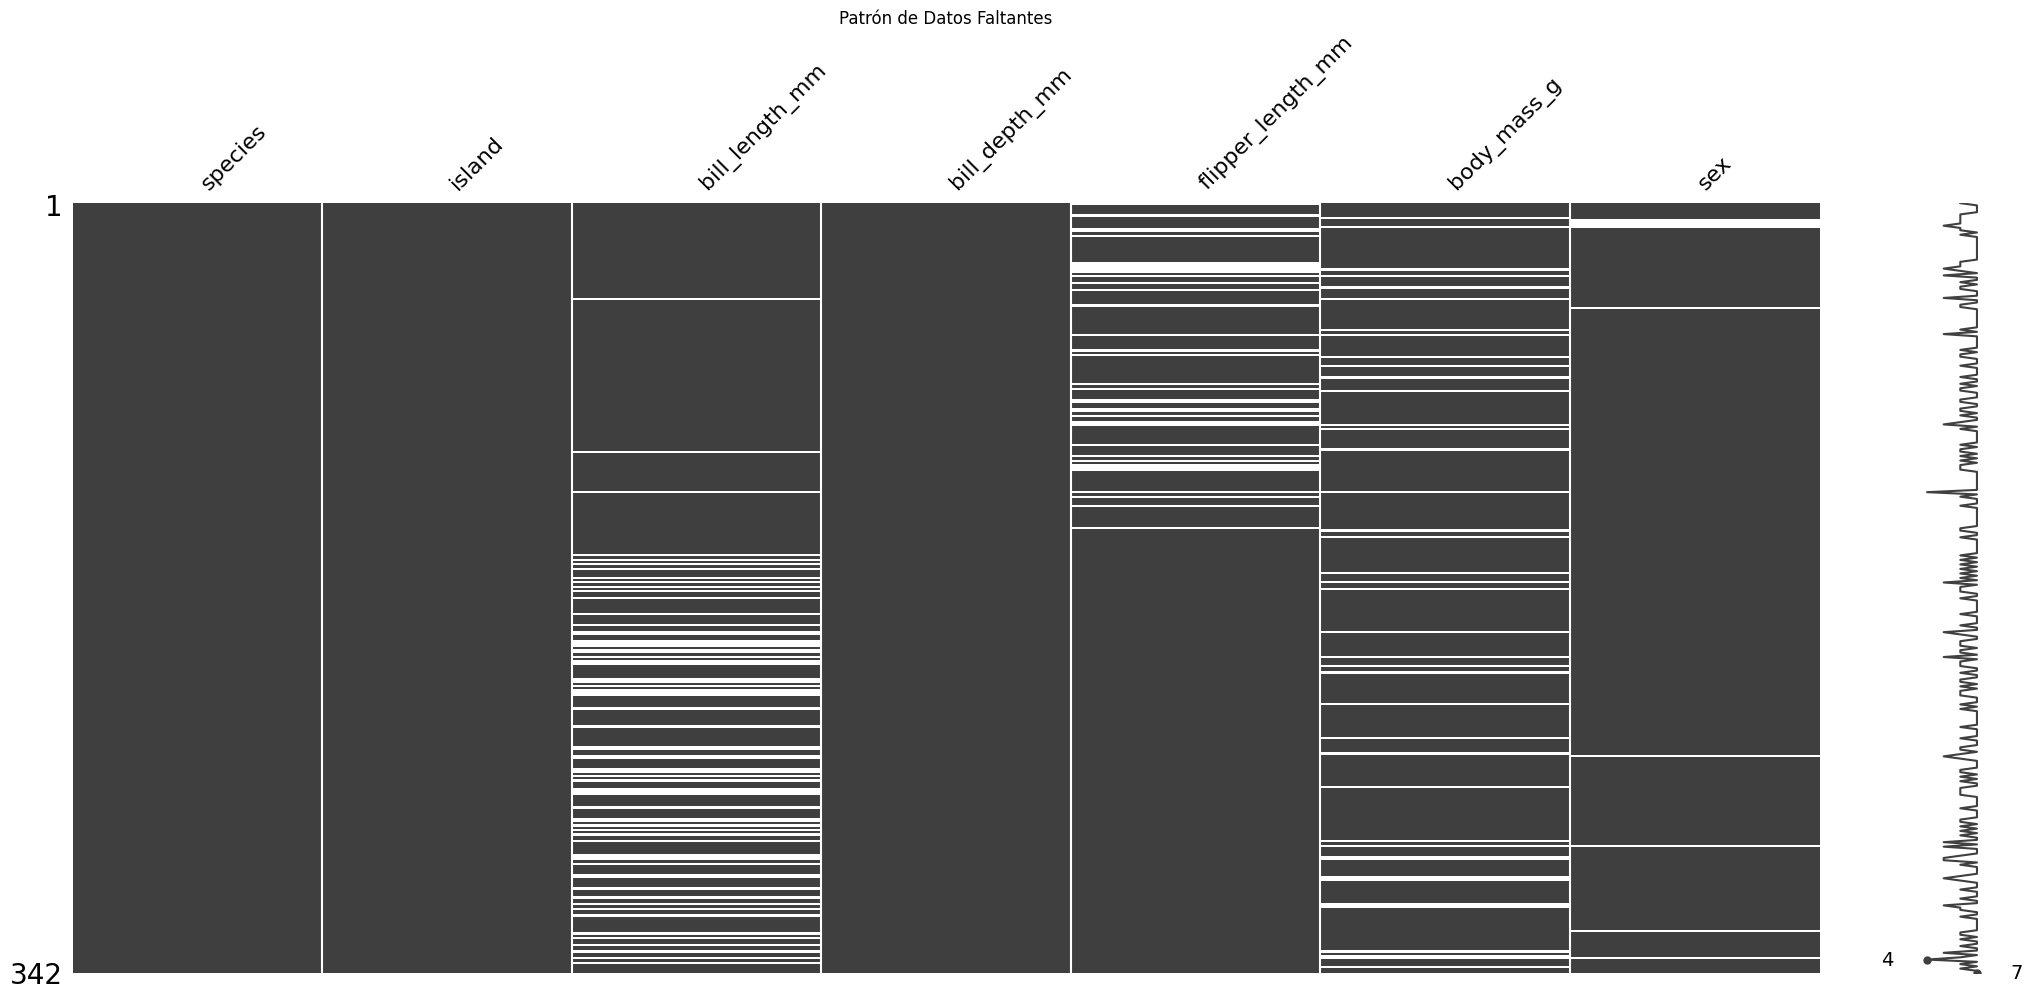

In [7]:
plt.figure(figsize=(10,6))
msno.matrix(df)
plt.title('Patrón de Datos Faltantes')
plt.show();

<Figure size 1600x600 with 0 Axes>

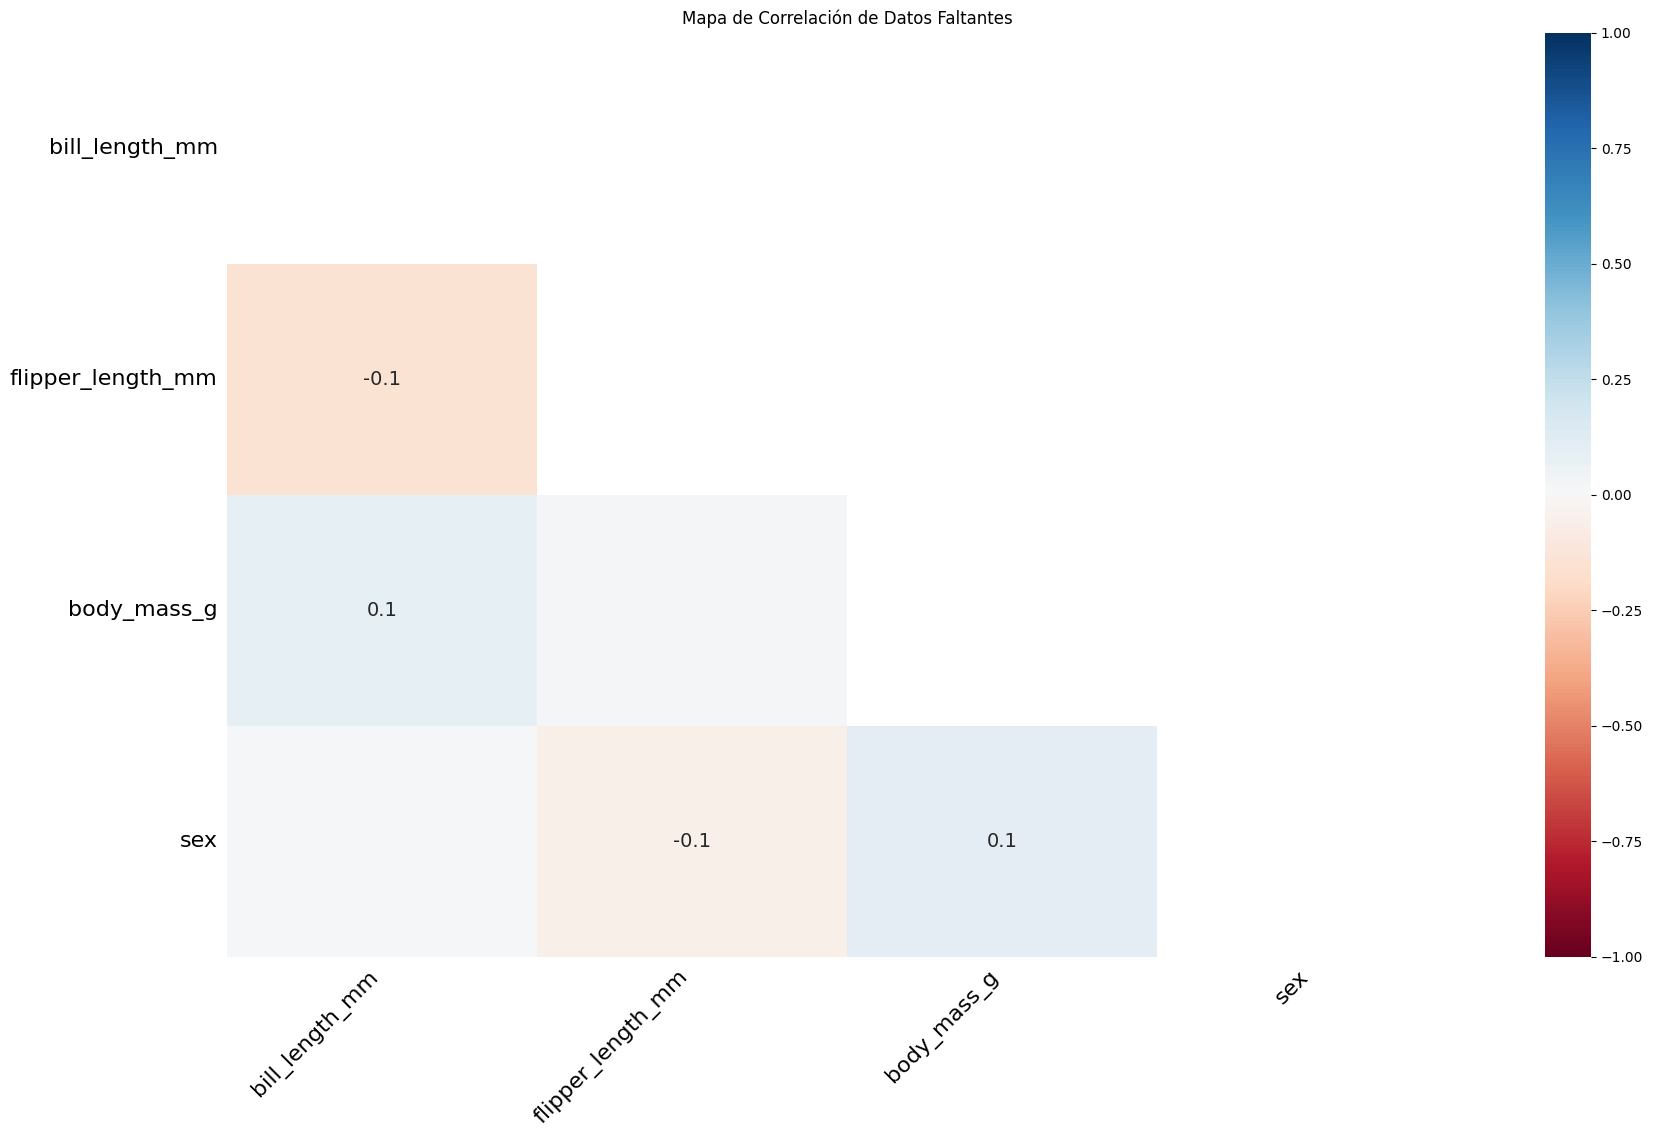

In [9]:
plt.figure(figsize=(16,6))
msno.heatmap(df)
plt.title('Mapa de Correlación de Datos Faltantes')
plt.show();


Un analisis de datos por cada tipo de dato faltante, esto se hace porque se quiere ver el por que de estos missing.

# Columna body_mass_g

In [16]:
print("Análisis de body_mass_g")
print("Media de datos con missing", original['body_mass_g'].mean()) #muestra
print("Media con datos faltantes;",
      df['body_mass_g'].dropna().mean()) #población

Análisis de body_mass_g
Media de datos con missing 4201.754385964912
Media con datos faltantes; 4179.568106312292


la medias son parecidas, por lo que no se puede diferenciar patrones, por lo que es un aleatorio total

# Columna flipper_length_mm MAR

In [17]:
print(df.groupby('species')['flipper_length_mm'].apply(lambda x: x.isna().mean()*100))

species
Adelie       23.84106
Chinstrap     0.00000
Gentoo        0.00000
Name: flipper_length_mm, dtype: float64


hay un relacion que en la columna flipper_length_mm hay faltantes en la variable de Adelie

# Columna bill MNAR

In [23]:
print(original['bill_length_mm'].mean())
print('Media de bill_length_mm con datos faltantes', 
      df['bill_length_mm'].mean())

43.9219298245614
Media de bill_length_mm con datos faltantes 42.80072727272727


Cuando no dan el dato pero es una razón mas rebuscada(ejemplo de la politica, los de derecha no dicen que votan los de izquierdas si)

## ¿Cómo tratar esos datos?

In [ ]:
#1.Tratamiento MCAR
#Podemos usar la imputación simple (después del analisis descriptivo)
body_mass_imputed= df['body_mass_g'].fillna(
    df['body_mass_g'].mean())
#2.Tratamiento MAR
flipper_imputed= df.groupby('species')['flipper_length_mm'].transform(
    lambda x: x.fillna(x.mean()))

#3.Tratamiento MNAR
#Aquí necesitariamos métodos más sofisticados, pero podemos mostrar un ejemplo simple 
from sklearn.impute import KNNImputer #asigna los valores mas similares a os misisng 
imputer= KNNImputer(n_neighbors=5)
bill_length_imputed=imputer.fit_transform(
    df[['bill_length_mm','bill_depth_mm', 'flipper_length_mm']])[:,0]


